Frozen lake
Reinforcement learing

FrozenLake environment consists of a 4 by 4 grid representing a surface. The agent always starts from the state 0 (S), [0,0] in the grid, and his goal is to reach the state 16 (G), [4,4] in the grid. On his way, he could find some frozen surfaces (F) or fall in a hole (H). If he falls, the episode is ended. When the agent reaches the goal, the reward is equal to one. Otherwise, it is equal to 0.

ILLUSTRATIVE INSTANCE

S F F F  
F H F H  
F F F H  
H F F G


In [1]:
import numpy as np
import gym

#gym python library for RL (can do a lot of cool stuffs, envs, spaces etc)

In [2]:
#instantiate the enviroment, get sizes
env = gym.make('FrozenLake-v1')
n_observations = env.observation_space.n
n_actions = env.action_space.n

C:\Users\Gift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\Gift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
#to initialize Q-table to zero
Q_table = np.zeros((n_observations, n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
#defining parameters and hyperparameters
#number of episodes to run
n_episodes = 50000

#max iter per episode
max_iter_episode = 100

#exploration probability
exp_prob = 1

#exploration decay (exponential)
exp_decreasing_decay = 0.001

#minimum of exploration probability
min_exp_prob = 0.01

#discounted factor
gamma = 0.99

#learning rate
lr = 0.1

used a function to make testing hyperparameters easier (using funtion args)

In [5]:
#MAIN LOOP FUNCTION
def mainloop(Q_table, n_episodes, max_iter_episode, exp_prob, exp_decreasing_decay, min_exp_prob, gamma, lr):
    reward_per_episode = list() #stores reward for every episode and returns it (would be used for evaluation)
    #iterate over episodes
    for e in range(n_episodes):
        #init first state of the episode
        current_state = env.reset()
        done = False

        #sum of rewards the agent gets from the env in current episode
        total_episode_reward = 0

        for i in range(max_iter_episode):
            #we sample a float from a uniform distribution between 0 and 1
            #if the sampled float is less than the exploration probability
            #   agent selects a random action (explore choices)
            #else
            #   agent exploits knowledge using bellman's equation

            if np.random.uniform(0, 1) < exp_prob:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[current_state, :])
            
            #the environment runs the chosen action action and returns 
            #the next state, a reward, and true if the episode has ended.
            next_state, reward, done, _ = env.step(action)

            #update Q_table using Q-learing iteration
            Q_table[current_state, action] = (1 - lr) * Q_table[current_state, action] + lr*(reward + gamma*max(Q_table[next_state, :]))
            total_episode_reward = total_episode_reward + reward
            
            #if episode has ended we leave loop 
            if done:
                break
            #else we go to the next state
            current_state = next_state

        #we update the exploration exponential using decay formular
        exp_prob = max(min_exp_prob, np.exp(-exp_decreasing_decay*e))
        reward_per_episode.append(total_episode_reward)
    return reward_per_episode


In [8]:
reward_per_episode = mainloop(Q_table, n_episodes, max_iter_episode, exp_prob, exp_decreasing_decay, min_exp_prob, gamma, lr)
print(len(reward_per_episode))


50000


In [15]:
print("Mean reward per thousand episodes")
data = []
for i in range(len(reward_per_episode)//1000):
    data.append(np.mean(reward_per_episode[1000*i:1000*(i+1)]))
    print((i+1)*1000, ": mean episode reward:", data[i])

itr = [x+1 for x in range(len(data))]

Mean reward per thousand episodes
1000 : mean episode reward: 0.044
2000 : mean episode reward: 0.208
3000 : mean episode reward: 0.433
4000 : mean episode reward: 0.616
5000 : mean episode reward: 0.698
6000 : mean episode reward: 0.681
7000 : mean episode reward: 0.676
8000 : mean episode reward: 0.679
9000 : mean episode reward: 0.678
10000 : mean episode reward: 0.701
11000 : mean episode reward: 0.69
12000 : mean episode reward: 0.657
13000 : mean episode reward: 0.674
14000 : mean episode reward: 0.676
15000 : mean episode reward: 0.686
16000 : mean episode reward: 0.673
17000 : mean episode reward: 0.681
18000 : mean episode reward: 0.671
19000 : mean episode reward: 0.694
20000 : mean episode reward: 0.674
21000 : mean episode reward: 0.694
22000 : mean episode reward: 0.722
23000 : mean episode reward: 0.664
24000 : mean episode reward: 0.675
25000 : mean episode reward: 0.653
26000 : mean episode reward: 0.68
27000 : mean episode reward: 0.687
28000 : mean episode reward: 0.6

To increase accuracy,
I could try increasing the training (number of episodes) --- I did increase it (from 10,000 to 50,000) --- 
or maybe perhaps other parameters 

I dont know for sure
But i can only get certain by testing

or perhaps algebra 🤠

EXCITING !!!

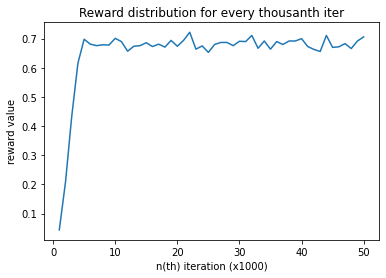

In [16]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(itr, data)
plt.xlabel('n(th) iteration (x1000)')
plt.ylabel('reward value')
plt.title('Reward distribution for every thousanth iter')
plt.show()

well then  
i guess that sums it up

for now our bes bet with this parameters is just about 0.7  
to get better avg rewards (> 0.7)
we might have to tune the parameters 👀

not sure tho
I'm still a noob

Source: https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187